# Cryptography

Cryptography is the process of **encrypting** and **decrypting** data. Most commonly it is used to protect your private data when you use the internet. Historically, cryptography was used during warfare to transfer messages between troops and commanders without the enemy being able to read them.

### Vocabulary
The original text of the message is called **plaintext** whereas the encrypted message is referred to as the **ciphertext**. The **key** is the information needed to perform the **encryption** and **decryption**; where encryption is the process of changing  the plaintext to ciphertext and decryption is the opposite process. A  **symmetric encryption** uses the same key  for encryption and decryption and an **asymmetric encryption** has different keys for encrypting and decrypting messages.

The **keyspace** denotes the set of all possible keys. Generally speaking a larger keyspace means a more secure encryption. As we will see the size of the keyspace is not all that matters. However, the opposite is definitely true: If the keyspace is too small, then the code can be cracked easily.

### Cryptography doesn't solve everything
<div>
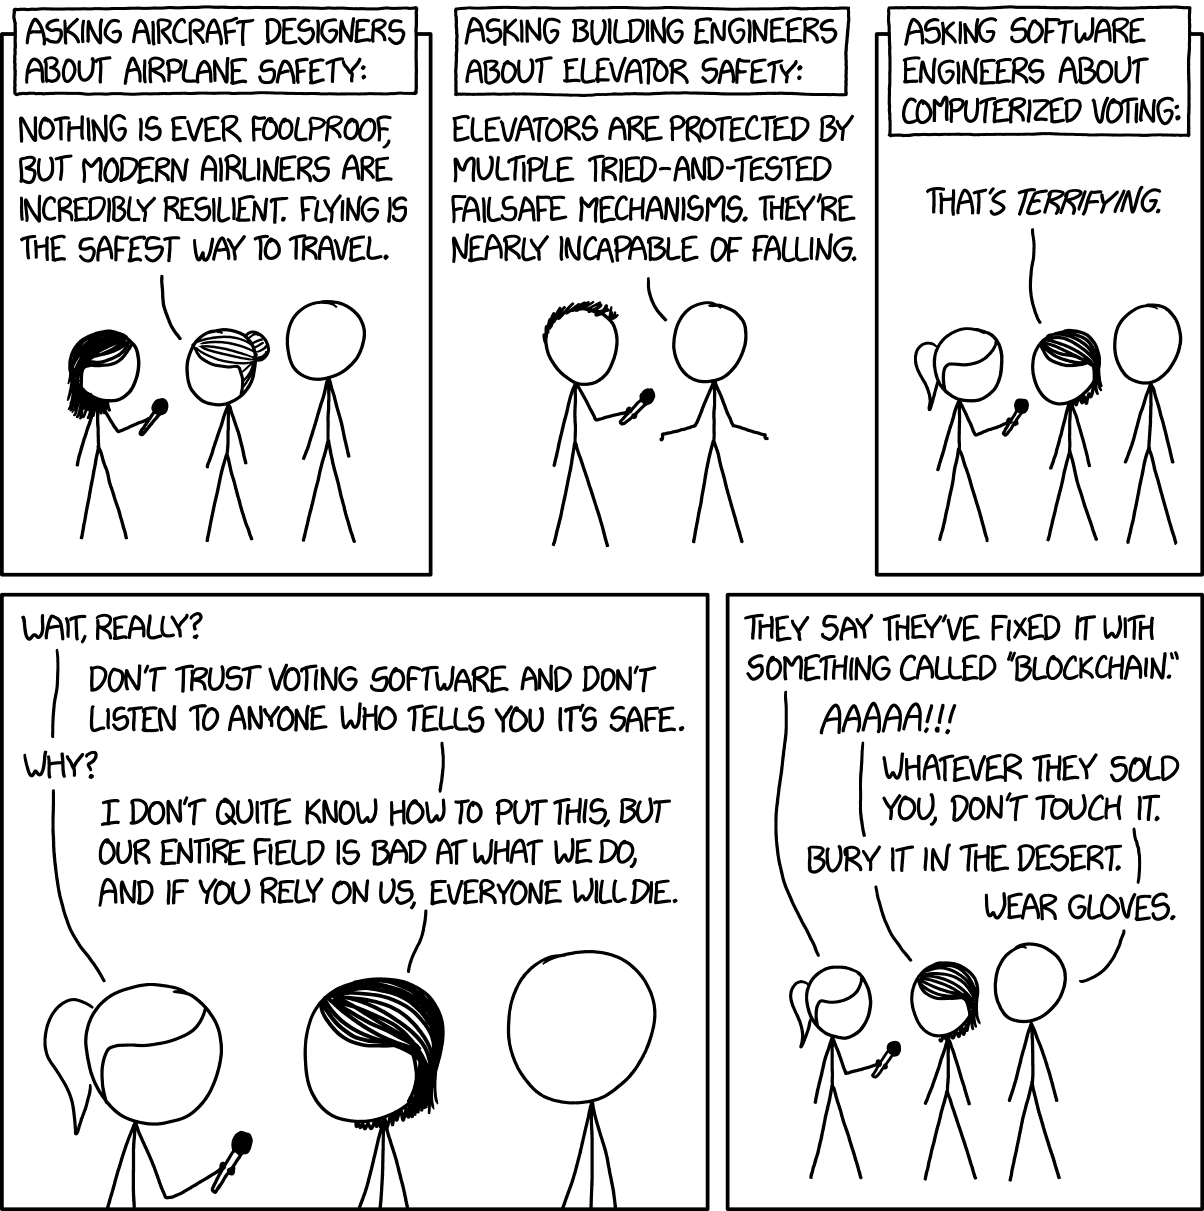
</div>

*https://xkcd.com/2030/*

# Cryptography Through The Ages

## 1. Steganography - Hiding Messages in Plain  Sight

Steganography is a way of hiding a secret message inside  of or on top of a message that is not secret. Possible examples include:
- writing with hidden ink on an otherwise harmless letter,
- sentences, where certain letters may convey a different message,
- using microdots to send messages,
- hiding digital information in text or image files, where you won't see it unless you speciifically look for it,
- ...

Steganography is not a *secure* method of transmitting messages, it simply tries to hide the fact that a secret message is being sent. If someone knows what they are looking for, they will find the secret message.

Can you find the hidden message?

> Since everyone can read, encoding text in neutral sentences is doubtfully effective.

## 2. Substitution Ciphers

Throughout history  many different techniques for encrypting coded messages have been developed. The most famous is probably the so-called *Caesar-Code* in which a message is encoded by shifting each letter a certain number of positions in the alphabet.
For example: If you shift the letters of "This is a secret message." by three postions you get
> Wklv lv d vhfuhw phvvdjh.

Can you decode the following message?
> Uif botxfs up mjgf, uif vojwfstf boe fwfszuijoh jt 42.

These types of encryptions are called **substitution ciphers**, since each letter of the alphabet is replaced by a different letter.

> How could you crack a secret message encoded using this method?
> Can you think of a way to make the Caesar-Code more secure?

Over time many  improvements were made to this type of encryption; including **polyalphabetic substitution ciphers** (where the shift changes with each letter) such as the *Vigenère-Code* and most famously the *Enigma Code* used by the germans in WWII.

If we run the following code, we can  then encode and decode messages using the Caesar-Code.

In [56]:
def vigenere_encrypt(text, key):
    res = "Ciphertext: "
    
    i = 0
    for c in text:
        # Implement HERE
        i = i + 1
        if ord(c) >= 97 and ord(c) <= 122:
            sc = ord(c) - 97
            sc = (sc + shift) % 26
            sc = sc + 97
        elif ord(c) >= 65 and ord(c) <= 90:
            sc = ord(c) - 65
            sc = (sc + shift) % 26
            sc = sc + 65
        else:
            sc = ord(c)
        res = res + chr(sc)
    return res

vigenere_encrypt("ATTACK", "LEMONL")

'Ciphertext: LXFOPV'

# Understanding Code

Make groups of 4 and try to understand the following code:

In [55]:
res = "Ciphertext: "
text = "ABCD"
shift = 1

for c in text:
    if ord(c) >= 65 and ord(c) <= 90:
        sc = ord(c) - 65
        sc = (sc + shift) % 26
        sc = sc + 65
    else:
        sc = ord(c)
    res = res + chr(sc)
    
print(res)

Ciphertext: BCDE


In [51]:
key = "LEMONLEMON"
text = "ATTACK"
i = 0
for c in text:
    print(ord(key[i]) - 65)
    i = i + 1
    
def vigenere_encrypt(text, key):
    res = "Ciphertext: "
    i = 0
    for c in text:
        # Implement HERE
        i = i + 1
        if ord(c) >= 97 and ord(c) <= 122:
            sc = ord(c) - 97
            sc = (sc + shift) % 26
            sc = sc + 97
        elif ord(c) >= 65 and ord(c) <= 90:
            sc = ord(c) - 65
            sc = (sc + shift) % 26
            sc = sc + 65
        else:
            sc = ord(c)
        res = res + chr(sc)
    return res

vigenere_encrypt("ATTACK", "LEMONL")

11
4
12
14
13
11


In [8]:
import ipywidgets as wdg

html = wdg.HTML("<h3>The Caesar-Code</h3>")
plaintext_c = wdg.Text(description="Plaintext: ")
encode_shift = wdg.IntSlider(10, description="Shift: ", min=0, max=25)
ciphertext_c = wdg.HTML("")
layout = wdg.VBox([html, plaintext_c, encode_shift, ciphertext_c])

def update(args):
    ciphertext_c.value = ceasar_encrypt(plaintext_c.value, encode_shift.value)
    
plaintext_c.observe(update)
encode_shift.observe(update)

layout

### The Vigenère Cipher

In a Caesar cipher, each letter of the alphabet is shifted along some number of places. For example, in a Caesar cipher of shift 3, a would become D, b would become E, y would become B and so on. The Vigenère cipher has several Caesar ciphers in sequence with different shift values.

To encrypt, a Vigenère square or Vigenère table can be used. It has the alphabet written out 26 times in different rows, each alphabet shifted cyclically to the left compared to the previous alphabet, corresponding to the 26 possible Caesar ciphers.

<img src="res/vigenere.svg" width="500px" style="padding-top: 20px"/>

For example, suppose that the plaintext to be encrypted is

> ATTACKATDAWN.

The person sending the message chooses a keyword and repeats it until it matches the length of the plaintext, for example, the keyword "LEMON":

> LEMONLEMONLE

For successive letters of the message, successive letters of the key string will be taken and each message letter enciphered by using its corresponding key row. The next letter of the key is chosen, and that row is gone along to find the column heading that matches the message character.

For example, the first letter of the plaintext, A, is paired with L, the first letter of the key. Therefore, row L and column A of the Vigenère square are used, namely L. Similarly, for the second letter of the plaintext, the second letter of the key is used. The letter at row E and column T is X. The rest of the plaintext is enciphered in a similar fashion:

> Plaintext: ATTACKATDAWN <br>
Key: LEMONLEMONLE <br>
Ciphertext: LXFOPVEFRNHR

Decryption is performed by going to the row in the table corresponding to the key, finding the position of the ciphertext letter in that row and then using the column's label as the plaintext. For example, in row L (from LEMON), the ciphertext L appears in column A, so A is the first plaintext letter. Next, in row E (from LEMON), the ciphertext X is located in column T. Thus T is the second plaintext letter. 

### Exercise
> Select a key and encrypt your own message by hand using the Vigenère method. Give your encrypted message and the key to a friend and  have them decrypt it.

In [16]:
def vigenere(text, key, p):
    text = text.upper()
    key = key.upper()
    res = "" #"Ciphertext: " if p == 1 else "Plaintext: "
    pos = 0
    for c in text:
        if ord(c) >= 65 and ord(c) <= 90:
            shift = ord(key[pos % len(key)]) - 65
            pos = pos + 1
            sc = ord(c) - 65
            sc = (sc + p*shift) % 26
            sc = sc + 65
        else:
            sc = ord(c)
        res = res + chr(sc)
    return res

key = "LEMON"
cipher = vigenere("ATTACKATDAWN", key, 1)
plaintext = vigenere(cipher, key, -1)
print(f"{cipher=}, {plaintext=}")

cipher='LXFOPVEFRNHR', plaintext='ATTACKATDAWN'


In [17]:
import ipywidgets as wdg

html1 = wdg.HTML("<h3>Vigenère Encryption</h3>")
html2 = wdg.HTML("<h3>Vigenère Decryption</h3>")
in_plaintext_v = wdg.Text(description="Plaintext: ")
in_ciphertext_v = wdg.Text(description="Ciphertext: ")
key = wdg.Text(description="Key: ")
out_plaintext_v = wdg.HTML("")
out_ciphertext_v = wdg.HTML("")
button_d = wdg.Button(description='Decode Now!')
button_e = wdg.Button(description='Encode Now!')

layout1 = wdg.VBox([html1, in_plaintext_v, key, button_e, out_ciphertext_v])
layout2 = wdg.VBox([html2, in_ciphertext_v, key,button_d, out_plaintext_v])
layout = wdg.HBox([layout1, layout2])

def on_button_e_clicked(args):
    out_ciphertext_v.value = vigenere(in_plaintext_v.value, key.value,1)
    
def on_button_d_clicked(args):
    out_plaintext_v.value = vigenere(in_ciphertext_v.value, key.value,-1)
    
button_e.on_click(on_button_e_clicked)
button_d.on_click(on_button_d_clicked)

layout

### Generalised Substitution Ciphers
In a generalised substitution cipher each letter is assigned a unique letter from  the alphabet. This is also known as a **mono-alphabetic substitution cipher**.

In [30]:
import ipywidgets as wdg

html = wdg.HTML("<h3>Generalised Substitution Cipher</h3>")
in_plaintext_g = wdg.Text(description="Plaintext: ")
alphabet = wdg.Text(description="New Alphabet")
out_ciphertext_g = wdg.HTML("")
button_e = wdg.Button(description='Encode Now!')

layout = wdg.VBox([html, in_plaintext_g, alphabet, button_e, out_ciphertext_g])

def encrypt(text, alphabet):
    text = text.upper()
    alphabet = alphabet.upper()
    res = "Ciphertext: "
    for c in text:
        if ord(c) >= 65 and ord(c) <= 90:
            pos = ord(c) - 65
            sc = ord(alphabet[pos])
        else:
            sc = ord(c)
        res = res + chr(sc)
    return res

    
def on_button_e_clicked(args):
    if len(alphabet.value) != 26:
        print("Please enter 26 letters in a chosen order")
    else:
        out_ciphertext_g.value = encrypt(in_plaintext_g.value, alphabet.value)
    
button_e.on_click(on_button_e_clicked)

layout

Please enter 26 letters in a chosen order


In [6]:
import random
alph = list("abcdefghijklmnopqrstuvwxyz")
random.shuffle(alph)
alph = ''.join(alph)
print(alph)

nkrcphlbjostwzdyamxiuvfgqe


## 3. Transposition Ciphers
In a transposition cipher positions of letters or blocks of letters are shifted by a regular system. The ciphertext is then a *permutation* of the plaintext. 

### Rail Fence Cipher
In the rail fence cipher, the plaintext is written downwards and diagonally on successive "rails" of an imaginary fence, then moving up when we get to the bottom. The message is then read off in rows. For example, using three "rails" and a message of 'WE ARE DISCOVERED FLEE AT ONCE', the cipherer writes out:

```
W . . . E . . . C . . . R . . . L . . . T . . . E
. E . R . D . S . O . E . E . F . E . A . O . C .
. . A . . . I . . . V . . . D . . . E . . . N . .
```

Then reads off

`WECRL TEERD SOEEF EAOCA IVDEN`

Note: The spacing in groups of five letters helps readability of the ciiphertext and does not convey any information on the spacing of the plaintext.

The recipient then has to write the letters in the proper pattern and read them diiagonally to get the plaintext back.

### Route Cipher
In a route cipher, the plaintext is first written out in a grid of given dimensions, then read off in a pattern given in the key. For example, using the same plaintext that we used for rail fence: 

```
W R I O R F E O E 
E E S V E L A N J 
A D C E D E T C X 
```

Here the plaintext is written vertically and two random letters are added to fill up the grid. If we now read the letters horizontally, we get the ciphertext:

`WRIOR FEOEE ESVEL ANJAD CEDET CX`

The *route* in the name route cipher refers to the route we take through the grid. In this case the route was "Read the rows horizontallly from left to right". We  could also specify for example "Read the letters in a clockwise spiral pattern starting in the upper left corner". This would give us the ciphertext:

`WRIOR FEOEJ XCTED ECDAE ESVEL AN`

### Columnar Transposition
In a columnar transposition, the message is written out in rows of a fixed length, and then read out again column by column, and the columns are chosen in some scrambled order.  The key is usually given by a sequence of numbers. For example using the same plaintext as above and the key "6 3 2 4 1 5" we  get the following grid (notice again that  missnig places are filled up with random letters):

```
6 3 2 4 1 5
W E A R E D
I S C O V E 
R E D F L E 
E A T O N C 
E Q K J E U 
```

The numbers tell us to write the plaintext in 6 columns and then read the columns in numerical order to get the ciphertext:

`EVLNE ACDTK ESEAQ ROFOJ DEECU WIREE`

The recipient just has to arrange the letters of the ciphertext in  the proper columns and can  then read out the plaintext.

### Enigma

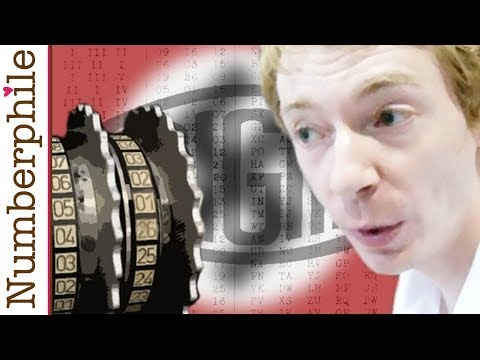

In [36]:
from IPython.display import YouTubeVideo

YouTubeVideo('G2_Q9FoD-oQ', width=600, height=300)

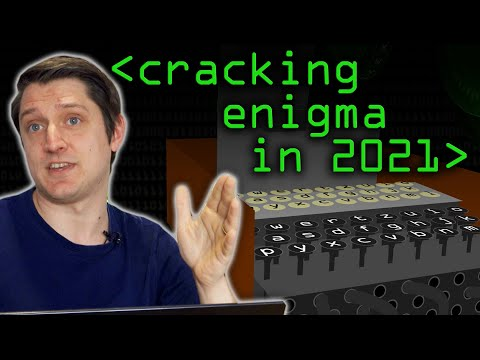

In [37]:
from IPython.display import YouTubeVideo

YouTubeVideo('RzWB5jL5RX0', width=600, height=300)

## 4. Security Issues

An encryption is called **cryptographically secure** if the cipher text contains no information about the content of the plaintext (other than the maximal length of the message).

None of the methods descibed above are *secure* in a cryptographical sense. They can all be cracked with relative ease. The main methods of attack are statistical analysis of the ciphertext and brute force methods. For example: In  English (and German) *e* is the most commonly used letter. Combining that with other common letters and common groupings of letters, means that a computer will be able to crack any one of these encodings in a matter of seconds.

Obviously, this is not good enough for E-banking or other critical tasks. So, how can we do better? 

The are two options: 
1. Use an 'uncrackable code'.
1. Use a method of encryption where cracking the code would take billions of years using the fastest computers.



### One Time Pads
There is actually an uncrackable code: A **One Time Pad  (OTP)** is a list of randomly generated numbers (or letters) that both  sides of a conversation have. As the name implies each set of numbers can only be used once and the list must be at least as long as the message you want to send. You can then simply add the postitional values of the letters to your list.

The resulting ciphertext will be impossible to decrypt or break if the following four conditions are met:

1. The key must be random (uniformly distributed and independent of the plaintext), and sampled from a non-algorithmic, chaotic source such as a *Hardware random number generator*.
1. The key must be at least as long as the plaintext.
1. The key must never be reused in whole or in part.
1. The key must be kept completely secret by the communicating parties.

### Computational Security
An encryption is called **computationally secure** if it cannot be cracked in *reasonable time* (reasonable time is usually definied as "age  of the universe" or something similar). In computer science the solving of these encryptions would be classified as "hard problems". It is important that these problems remain hard even if the attacker has every information about the encryption except the key (and of course the plaintext) - i.e. the attacker knows which method was used, who sent what to whom, can read the ciphertext etc.

### Total Security?
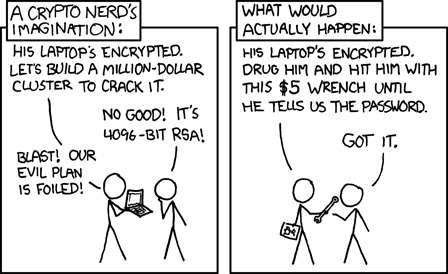
*https://xkcd.com/538/*

In [39]:
# Random Numbers for a One Time Pad
from random import randint

otp_def = []

for i in range(20):
    otp_def.append(randint(10000,99999))
    
print(otp_def)

[84427, 37228, 92708, 45894, 58893, 50452, 33545, 74605, 37568, 50738, 82031, 68655, 75453, 83520, 44230, 13051, 56313, 16001, 96547, 38794]


### <span style="color: blue"> Exercise </span>
>Write code to encrypt a message using the one time pad calculated above. 

In [45]:
import ipywidgets as wdg

html = wdg.HTML("<h3>One Time Pad</h3>")
in_plaintext_otp = wdg.Text(description="Plaintext: ")
out_ciphertext_otp = wdg.HTML("")
button_e = wdg.Button(description='Encode Now!')

layout = wdg.VBox([html, in_plaintext_otp, button_e, out_ciphertext_otp])

#save the calculated random sequence as a new array so that it doesn't 
#change during the process.
otp = otp_def

def encrypt(text, pad):
    text = text.upper()
    res = "Ciphertext: "
    
    for ind, c in enumerate(text):
        sc = ord(c) - 65
        rc = sc - otp[ind]
        rc = rc % 26
        res = res + chr(rc + 65)
    
    return res
    
def on_button_e_clicked(args):
    out_ciphertext_otp.value = encrypt(in_plaintext_otp.value, otp)
    
button_e.on_click(on_button_e_clicked)

layout

## Attacking Encrypted Messages
**Cryptanalysis** (in this particular case) refers to the process of analyzing encryptions in order to determine a unknown plaintext. Depending on the the knowledge one has about the encryption we distinguish different types of attacks:
- Ciphertext-only: the cryptanalyst has access only to a collection of ciphertexts or codetexts.
- Known-plaintext: the attacker has a set of ciphertexts to which they know the corresponding plaintext.
- Chosen-plaintext (chosen-ciphertext): the attacker can obtain the ciphertexts (plaintexts) corresponding to an arbitrary set of plaintexts (ciphertexts) of their own choosing.
- Adaptive chosen-plaintext: like a chosen-plaintext attack, except the attacker can choose subsequent plaintexts based on information learned from previous encryptions, similarly to the Adaptive chosen ciphertext attack.
- Related-key attack: Like a chosen-plaintext attack, except the attacker can obtain ciphertexts encrypted under two different keys. The keys are unknown, but the relationship between them is known; for example, two keys that differ in the one bit.

Especially the classical encryption methods (Caesar, Vigenère etc.) are very vulnerable to cryptoanalytical attacks. Frequency analysis is the basic tool for breaking most classical ciphers. In natural languages, certain letters of the alphabet appear more often than others; in English, "E" is likely to be the most common letter in any sample of plaintext. Similarly, the digraph "TH" is the most likely pair of letters in English, and so on. 

For example, in a simple substitution cipher (where each letter is simply replaced with another), the most frequent letter in the ciphertext would be a likely candidate for "E". Afterwards you look for common words or patterns that fit the given results

Here is a graph showing the most common letter frequencies for English:
<div>
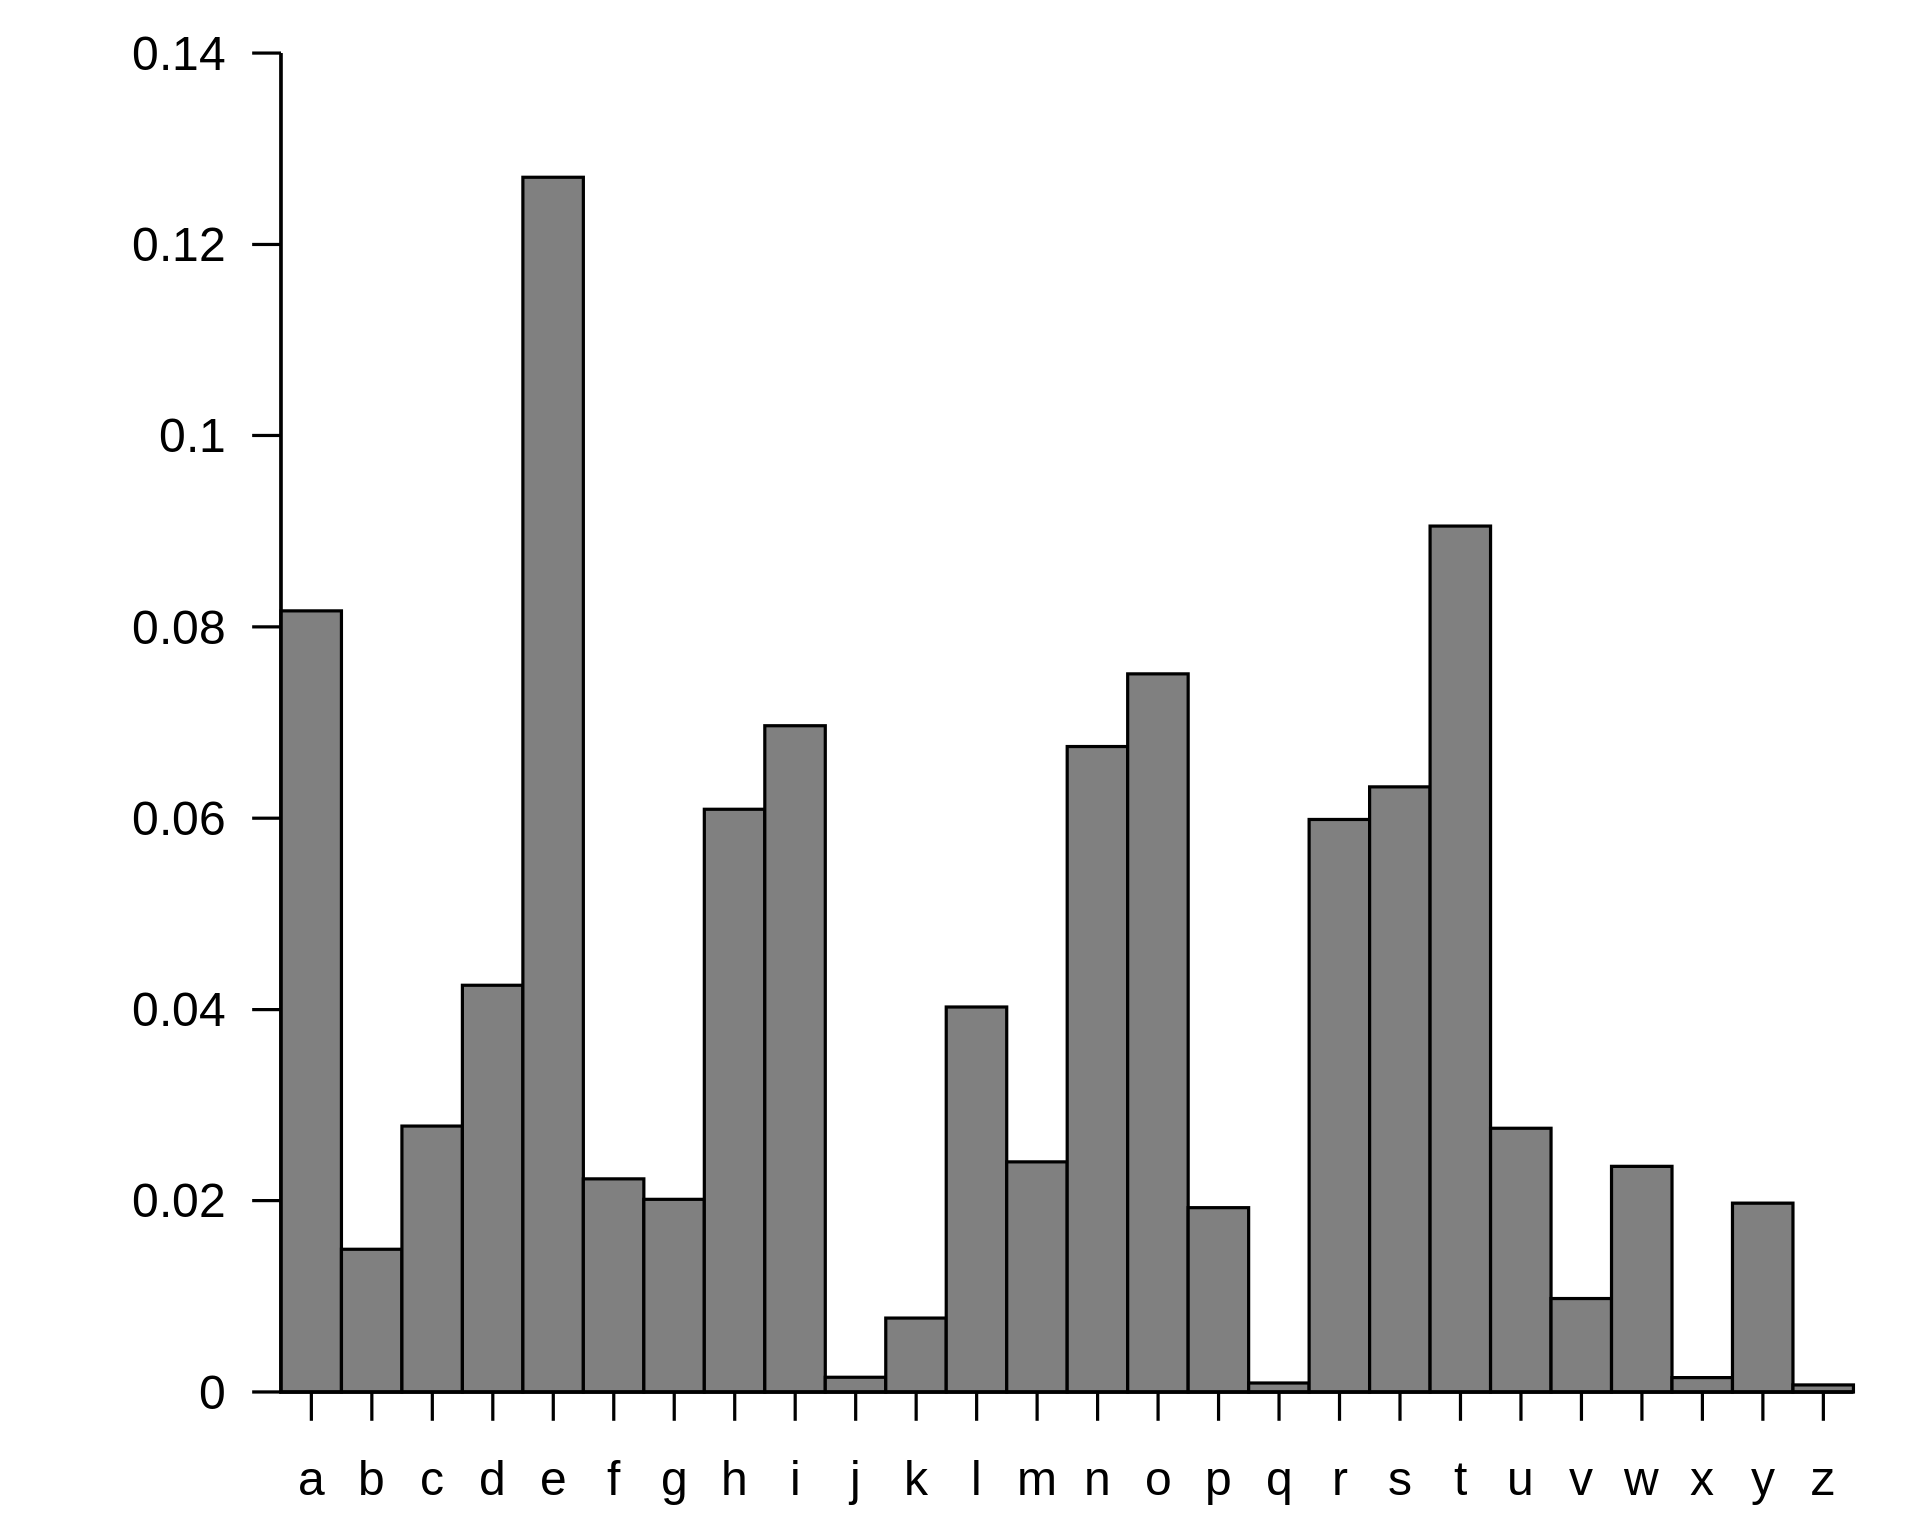
</div>

### <span style="color: blue"> Exercise </span>
>The link 
https://www.101computing.net/frequency-analysis/
gives a tool that can be used to decrypt a hidden message using frequency analysis. Use it to solve the sample text given by the webpage. If you want an additional challenge, you can also try to decrypt the text below.

> E UHPN TGID ENH, GP E NEUEAV YEF, YEF ECEV... GT GK E WEFM TGID YHF TRD FDSDUUGHP. EUTRHZNR TRD WDETR KTEF REK SDDP WDKTFHVDW, GILDFGEU TFHHLK REQD WFGQDP TRD FDSDU YHFXDK YFHI TRDGF RGWWDP SEKD EPW LZFKZDW TRDI EXFHKK TRD NEUEAV. DQEWGPN TRD WFDEWDW GILDFGEU KTEFYUDDT, E NFHZL HY YFDDWHI YGNRTDFK UDW SV UZMD KMVCEUMDF REK DKTESUGKRDW E PDC KDXFDT SEKD HP TRD FDIHTD GXD CHFUW HY RHTR. TRD DQGU UHFW WEFTR QEWDF, HSKDKKDW CGTR YGPWGPN VHZPN KMVCEUMDF, REK WGKLETXRDW TRHZKEPWK HY FDIHTD LFHSDK GPTH TRD YEF FDEXRDK HY KLEXD…

### <span style="color: blue"> Exercise </span>
> Determine how many elements the keyspaces of the following encryption methods have:
- Caesar Code
- Generalized Substitution Cipher
- Vigenère Code with a keyword length of 5
- A route cipher on a text containing 15 characters, where the route can only be horizontal or vertical reading of lines in order forwards or backwards.

### <span style="color: blue"> Exercise </span>
> How could you use frequency analysis to crack a Vigenère Cipher with a keyword of length 5?

### <span style="color: blue"> Exercise </span>
> How could you use frequency analysis to crack a Vigenère Cipher with a keyword of any length (tricky)?

# Modern Encryption

Modern encryption uses completely different techniques, based on math and computational structures to encrypt and decrypt messages. There are two main  variants: **Symmetric encryption** where both parties decide on a cipher key beforehand and then encrypt their messages using this key and **asymmetric encryption** where one part of the key is public and another part of the key is private. Messages can be encoded with the public key, but only someone with  the private key can decode them.

Modern symmetric encryption can be thought of (in a very simplified fashion) as a combination of substitution ciphers and transposition ciphers.

Modern  asymmetric encryption is based on mathematical results from number theory and generally utilize properties of prime numbers.

## 1. Asymmetric Encryption

Asymmetric Encryption or Public-key Cryptography is a cryptographic system consisting of two distinct keys - a **public key** and a **private key**. The idea behind asymmetric encryption is the idea of a **one-way function** (also sometimes called a **trapdoor function**) that is easy to calculate in one direction, but very hard to undo.

Imagine mixing some hot and some cold water together. This gives you a certain  quantity of warm water, however undoing this operation is next to impossible. In mathematics there are certain problems that are easy to do one way, but very hard to undo.

For example: Multiplying two very large prime numbers is a comparitively simple task for a computer; however, the inverse: computing the factors of such a product is very hard. 

```
<side note>
*very hard* is actually a defined term in computer science. It basically boils down to the fact that it takes a very long time (think age of the universe) to compute.
</side note>
```

> Homework: Watch the following video on the Diffie-Helman Key Exchange. This is an example of how asymmetric methods can be used to give both sides a common key.

In [46]:
%%HTML
<iframe width="560" height="315" 
src="https://www.youtube.com/embed/NmM9HA2MQGI" 
title="YouTube video player" frameborder="0" 
allow="accelerometer; autoplay; clipboard-write; 
encrypted-media; gyroscope; picture-in-picture" allowfullscreen>
</iframe>

In general asymmetric encryption methods take longer than symmetric ones. Therefore, the preferred technique is to use a combination of symmetric and asymmetric encryptions. The asymmetric method is used to communicate the key for the symmetric encryption. Afterwards, the symmetric encryption is used for a sesssion.

### RSA
**RSA** (Rivest–Shamir–Adleman) is a public-key cryptosystem that is widely used for secure data transmission. It is also one of the oldest. The acronym RSA comes from the surnames of Ron Rivest, Adi Shamir and Leonard Adleman, who publicly described the algorithm in 1977.

## 2. TLS and TLS Handshake
Transport Layer Security (TLS) is a cryptographic protocol designed to provide communications security over a computer network. The protocol is widely used in applications such as email, instant messaging, and voice over IP, but its use as the Security layer in HTTPS remains the most publicly visible.

At the beginning of each **session** a "TLS Handshake" will occur. This ensures that both parties are who they say they are and allows them to agree on a common symmetric key for the session.

A visual representation of such a handshake can be seen here:


First the client calls on a server who responds and sends the client their public key. The client sends their public key to the server and calculates the session key using his/her private key in combination with the servers public key. The server also calculates the session key using its private key in combination with the clients public key. 
> ... \*lots of math\* ...

Now both the server and the client have the same session key, without knowing anything about the others private key. They may now use this to exchange data or a symmetric key if they need a lot of bandwidth.

## 3. AES
AES (Advanced Encryption Standard) is the primary (symmetric) method with which data on the web is encrypted. It is a symmetric encryption method using both substitutions and transpositions. The exact workings of AES are quite complex, however the basic idea is not too difficult to understand: The plaintext is split up into blocks of equal length, then some bits are substituted, some bits are swapped around and this is repeated multiple times (often 10). The encryption occurs where the key is added in to these rounds (especially in the beginning and the end). The final output is ciphertext that can only be decrypted with the key  (or by brute force - but again "age of universe").
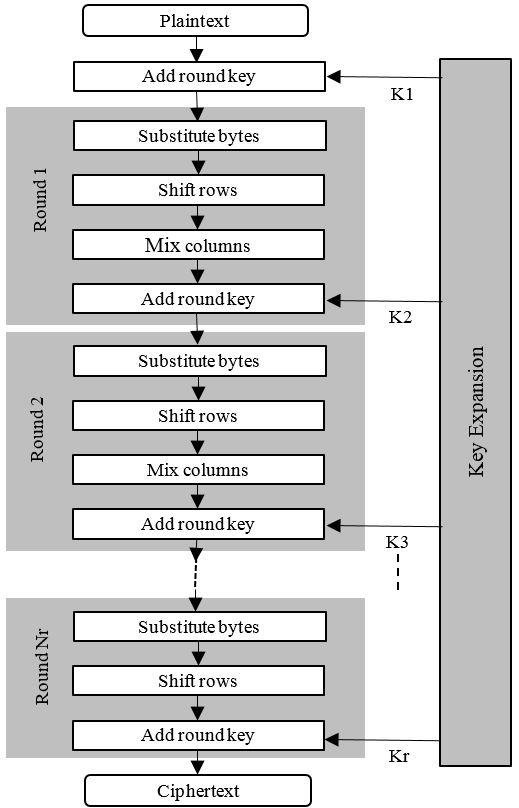
*source: https://www.researchgate.net/figure/Advanced-Encryption-Standard-AES-Algorithm_fig5_321587376*

## 4. Extras

The videos below show an introduction to modern encryption methods.

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('DLjzI5dX8jc', width=600, height=300)

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('GSIDS_lvRv4', width=600, height=300)

In [6]:
from IPython.display import YouTubeVideo

YouTubeVideo('Yjrfm_oRO0w', width=600, height=300)

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('lvTqbM5Dq4Q', width=600, height=300)